### Load Pre-Processed Data

In [5]:
# retrieve stored values

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le


### Setting up CNN

In [6]:
disable_gpu = False

# To disable gpu if wanted
if disable_gpu:
    import os
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics
import tensorflow as tf

if len(tf.config.list_physical_devices('GPU')):
    print("GPU detected")
else:
    print("CPU detected, this may take a while")

GPU detected


In [7]:
# possible way to free up gpu memory after easier https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/discussion/96876

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

### Compiling Model

In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [9]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 41, 64)        

In [10]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
#import tqdm.notebook as tqdm
import tqdm
from tqdm.keras import TqdmCallback

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='models/weights.best.basic_cnn.hdf5', 
                               verbose=0, save_best_only=True)
start = datetime.now()
    
history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer,TqdmCallback(verbose=1), history], verbose = 0)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Training completed in time:  0:02:18.631829


### Results from training


In [7]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9930695295333862
Testing Accuracy:  0.9198588728904724


KeyError: 'acc'

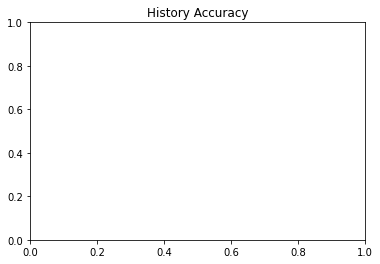

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('History Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')

In [ ]:
plt.figure()
plt.title('History Loss')
plt.plot(history.histroy['loss'])
plt.plot(history.histroy['val_loss'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')

### Save model for use elsewhere

In [ ]:
import pickle

model.save('sound_category_model.h5')

# sound_model_file = "sound_model.pkl"

# with open(sound_model_file, 'wb') as file:
#     pickle.dump(model, file)

label_encoder_file = "labelencoder.pkl"


    
with open(label_encoder_file, 'wb') as file:
    pickle.dump(le, file)

#%store model
